# Modelling approach

The below cells show the modelling process.

In [2]:
# Reload local modules as they are changing a lot
%load_ext autoreload
%autoreload 2
import warnings

# Deprecations and pandas slice warnings due to the train_test split
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load in data from the `DATA_DIR` 

In [3]:
from trainer_lib import DataManager
from trainer_lib.utils.notebook_config import DATA_DIR, REPORT_DIR
print(f"Data directory: {DATA_DIR}")
print(f"Report directory: {REPORT_DIR}")
# The instantiation will fetch the data and documentation
mngr = DataManager(save_path=DATA_DIR, report_path=REPORT_DIR)
X,y = mngr.train


Data directory: ../data/raw/
Report directory: ../reports/


In [63]:
from trainer_lib.modelling.train import Trainer, Evaluation, Explain
trainer = Trainer(X,y)
trainer.train()

───────────────────────────────────── XGB ──────────────────────────────────────
Starting grid search...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
[10:49:29] Best parameters: {'model__max_depth': 3,                 train.py:202
           'model__n_estimators': 100}                                          
           Mean CV score:  0.924744                                 train.py:203
           Standard deviation of CV score:  0.009380                train.py:204


{'XGB': 0.924744006674095}

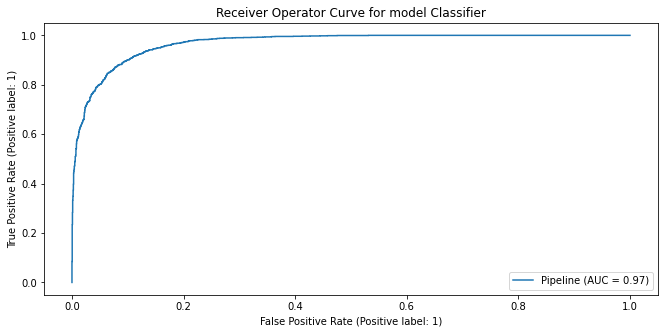

{'f1_score': 0.9166666666666666, 'accuracy': 0.901}

In [64]:
evaluator = Evaluation(trainer.best_classifier, X, y)
evaluator.run()
p, metrics = evaluate
metrics

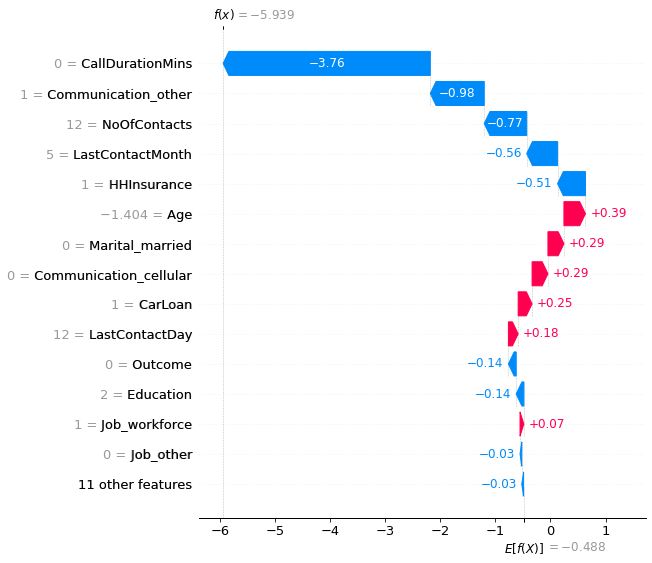

In [65]:
explain = Explain(trainer.best_classifier, X_test)
explain.waterfall()

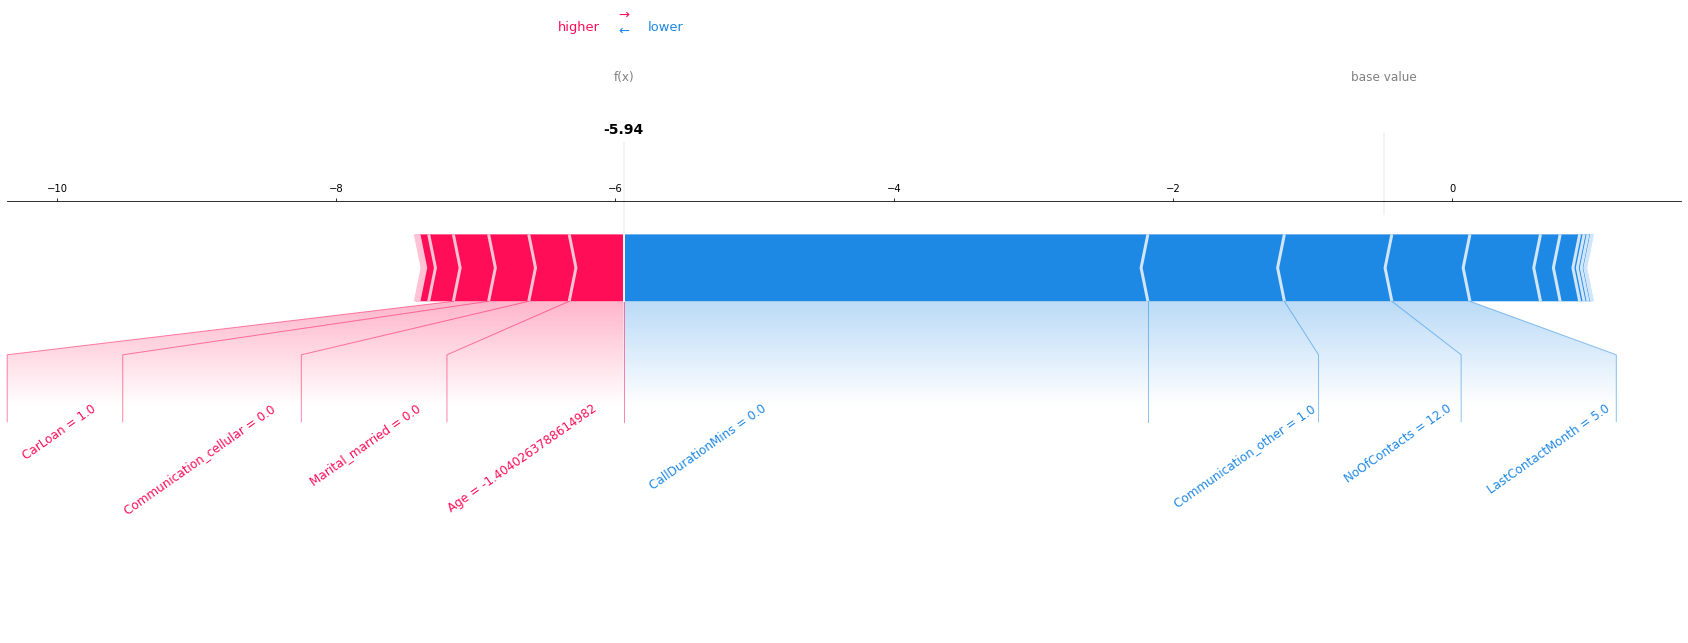

In [66]:
explain.prediction()

In [62]:
trainer.save_best()

Model saved as ../models//a4b6c090d5e14277262c2f8cfa6164d42e12ce64.pkl!


{'pipeline_hash': '7139c549c9094758f89a755b57c1fe1437adbced',
 'raw_hash': 'e3849e8af1641e1a439a454dace12d364a5220e3',
 'processed_hash': '58a542cf7f77346437378c7171d810ef71b55832',
 'estimator_id': 'a4b6c090d5e14277262c2f8cfa6164d42e12ce64'}

In [4]:
X_t, _ = mngr.test

In [11]:
import pandas as pd
pd.DataFrame([X.loc[0].values.T])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30
